In [1]:
import pandas as pd
import numpy as np
# Libraries for Text Preprocessing
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Libraries for Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data_set = pd.read_csv('./data_training/dataset_6.csv')
data_set.head()

,text,aspek,sentiment,hotel,lokasi,kamar,pelayanan,makanan,harga
0,shuttle gratis malioboro,harga,positive,0,0,0,0,0,1
1,dapat gratis course golf,harga,positive,0,0,0,0,0,1
2,gratis andong keliling,harga,positive,0,0,0,0,0,1
3,sesuai harga,harga,positive,0,0,0,0,0,1
4,harga terjangkau,harga,positive,0,0,0,0,0,1


In [3]:
tokenizer=Tokenizer(1500)
tokenizer.fit_on_texts(data_set["text"].values)
X=tokenizer.texts_to_sequences(data_set["text"].values)
X=pad_sequences(X, maxlen=31, padding='post')
vocab_size = len(tokenizer.word_index) + 1
data_set.head()
print(X)
# print(X.shape)
# print(vocab_size)

[[ 542   43  112 ...    0    0    0]
 [  42   43 1199 ...    0    0    0]
 [  43  970  618 ...    0    0    0]
 ...
 [ 537    7  156 ...    0    0    0]
 [   1    2  115 ...    0    0    0]
 [   9    1   17 ...    0    0    0]]


In [5]:
# tokenize_text = pd.DataFrame({
#     'original_text':data_set["text"],
#     'tokenized_text':X[0]
# })
# tokenize_text.head(20)
# # print(prediction_sentiment_result_convert)

In [6]:
y=pd.get_dummies(data_set[["sentiment"]])

# switch values for data aspect makanan
new_column_order = ['sentiment_positive', 'sentiment_negative']
y = y[new_column_order]

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import tensorflow as tf

model = Sequential()
model.add(Embedding(vocab_size, 32,input_length = 31))
model.add(SpatialDropout1D(0.8))
model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/10
135/135 [==============================] - 6s 27ms/step - loss: 0.6934 - acc: 0.4879 - val_loss: 0.6931 - val_acc: 0.5065
Epoch 2/10
135/135 [==============================] - 4s 27ms/step - loss: 0.6932 - acc: 0.5012 - val_loss: 0.6928 - val_acc: 0.5065
Epoch 3/10
135/135 [==============================] - 3s 25ms/step - loss: 0.5798 - acc: 0.7087 - val_loss: 0.5176 - val_acc: 0.7853
Epoch 4/10
135/135 [==============================] - 4s 26ms/step - loss: 0.5073 - acc: 0.7831 - val_loss: 0.3790 - val_acc: 0.8690
Epoch 5/10
135/135 [==============================] - 3s 24ms/step - loss: 0.4731 - acc: 0.8129 - val_loss: 0.3881 - val_acc: 0.8671
Epoch 6/10
135/135 [==============================] - 3s 24ms/step - loss: 0.4359 - acc: 0.8380 - val_loss: 0.3402 - val_acc: 0.8922
Epoch 7/10
135/135 [==============================] - 3s 25ms/step - loss: 0.4365 - acc: 0.8319 - val_loss: 0.3521 - val_acc: 0.8820
Epoch 8/10
135/135 [==============================] - 3s 25ms/step - 

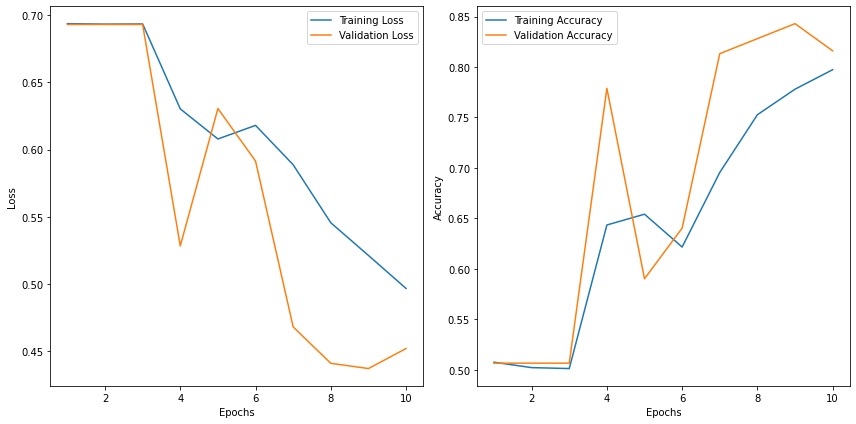

In [13]:
# create learning curve each model
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, 11)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # Hotel yang nyaman, tempat tidur besar, toilet bersih, sarapan enak dan variasi makanan lumayan banyak. 
# review_test=['pelayanan sangat baik dan ramah pada pengunjung.']
review_test = ['kamar pengap tidak ada jendela yang memadai']
review_tok=tokenizer.texts_to_sequences(review_test)
review_pad=pad_sequences(review_tok,maxlen=31,padding='post')
prediction=model.predict(review_pad).flatten()

# Convert probabilities to binary class labels
threshold = 0.5
prediction = tf.nn.softmax(prediction)
prediction = tf.where(prediction < threshold, 0, 1)

print("prediction: ", prediction.numpy())

In [ ]:
model.save('sentiment_aspek.h5')

In [5]:
import neattext.functions as nfx

data_validation = pd.read_excel('./data_evaluation/validation_sentimen.xlsx')

def cleaning(text):
    text = re.sub(r'\n',' ',text) # Hapus \n (enter)
    # text = nfx.remove_hashtags(text) # Hapus hashtags
    text = nfx.remove_numbers(text) # Hapus number
    # text = text.strip() # Hapus Whitespace
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Hapus karakter selain alfabet dan angka
    return text

def casefolding(text):
    return text.lower()

data_validation['content_cleaned'] = data_validation['Text'].apply(cleaning).apply(casefolding)

data_validation.head()

,Text,Sentimen,content_cleaned
0,"Kamar yg bersih, fasilitas oke lokasi dekat dg...",positive,kamar yg bersih fasilitas oke lokasi dekat dg ...
1,"Staffnya ramah dan sigap, untuk menu makanan j...",positive,staffnya ramah dan sigap untuk menu makanan ju...
2,Super duper ramah all staff.nya. Hotelnya bers...,positive,super duper ramah all staff nya hotelnya bersi...
3,Sarapan sahurnya juga enak banget rasanya. Lok...,positive,sarapan sahurnya juga enak banget rasanya loka...
4,Lokasi hotel dekat dengan jalan raya dan ramai...,positive,lokasi hotel dekat dengan jalan raya dan ramai...


In [8]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data_validation['content_cleaned'])
X=tokenizer.texts_to_sequences(data_validation['content_cleaned'])
X=pad_sequences(X, maxlen=31, padding='post')

# threshold = 0.5
# prediction_result = []

# predictions_label = model.predict(X)
# predictions_label = tf.where(predictions_label < threshold, 0, 1)

# for result in predictions_label:
#     prediction_result.append(result[0].numpy())

# print(prediction_result)

In [12]:
from keras.models import load_model

model_filenames = ['./aspect_sentiment_models/harga_aspek_dan_sentiment.h5', './aspect_sentiment_models/kamar_aspek_dan_sentiment.h5']  # List of models
prediction_sentiments = []
threshold = 0.5

models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)

# Lakukan prediksi pada seluruh data test menggunakan setiap model
predictions = np.zeros((X.shape[0], len(models)))

for i, model in enumerate(models):
    preds = model.predict(X)
    preds_binary = np.where(preds > 0.5, 1, 0)
    print(preds_binary)
    for j, pred in enumerate(preds_binary):
        predictions[j][i] = pred[0]
        
prediction_aspect_result = predictions.astype(int)

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = data_validation['Sentimen'].tolist()
sentiment_mapping = {'positive': 1, 'negative': 0}
actual_sentiment = [sentiment_mapping[sentiment] for sentiment in data]

# Membuat confusion matrix
confusion_mat = confusion_matrix(prediction_result, actual_sentiment)

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(actual_sentiment, prediction_result)
F1_score = metrics.f1_score(actual_sentiment, prediction_result)
print("Accuracy :", Accuracy)
print("F1_score :", F1_score)

In [ ]:
prediction_sentiment_result_convert = pd.DataFrame({
    'original_text':data_validation['text'],
    'text_cleaned':data_validation['content_cleaned'],
    'actual_sentiment': actual_sentiment,
    'predicted_sentiment': prediction_result
})
prediction_sentiment_result_convert.head(20)
# print(prediction_sentiment_result_convert)

In [ ]:
prediction_sentiment_result_convert.to_csv('result.csv', index=False)

In [ ]:
test_list = [ 'kamar pengap tidak ada jendela yang memadai',
             'harga terlalu mahal tidak sesuai dengan pelayanan',
             'makanan di resto hotel begitu buruk dan tidak enak',
             'kamar mandi hotel ini buruk sekali',
             'pelayanan buruk, tidak ramah pada pengunjung',
             'pelayanan di resto kurang baik',
             'kamar yg bersih fasilitas oje lokasi dekat dg penjual makanan serta pelayanan yg ramah',
             'respon staff baik dan cepat',
             'pelayanan semua ramah dan bagus saya suka',
             'fasilitas hotel bagus yang sangat lengkap seperti bintang lima',
             'saya suka lokasi hotel strategis dekat banyak rumah makan',
             'kamarnya juga bersih dan nyaman',
             'makanan dan minuman untuk sarapan pagi bervariasi buat anak-anak suka',
             'makanan dan minuman sarapan pagi enak semua',
             'makanan di hotel ini lezat',
             'kamar mewah dengan balkon pemandangan kota',
             'harga terjangkau kualitas bintang lima, saya sangat suka',
            ]
# test_list = ['tidak suka kamar sempit']
text = test_list

tokenizer.fit_on_texts(text)
test_sequences = tokenizer.texts_to_sequences(text)
test_pad = pad_sequences(test_sequences, maxlen=31, padding='post')

print(test_pad)

In [ ]:
from keras.models import load_model

model_filenames = ['./aspect_sentiment_models/harga_aspek_dan_sentiment.h5', './aspect_sentiment_models/kamar_aspek_dan_sentiment.h5', './aspect_sentiment_models/pelayanan_aspek_dan_sentiment.h5']  # List of models
prediction_sentiments = []
threshold = 0.5

models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)

predictions = np.zeros((test_pad.shape[0], len(model_filenames)))

for i, model in enumerate(models):
    preds = model.predict(test_pad)
    preds_binary = np.where(preds > 0.5, 1, 0)
    for j, pred in enumerate(preds_binary):
        predictions[j][i] = pred[0]

prediction_result = predictions.flatten().astype(int)

print(prediction_result)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Nilai prediksi dan actual dalam bentuk list of array
y_pred = prediction_result
y_actual = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_pred, y_actual)

confusion_df = pd.DataFrame(confusion_mat, index=['False', 'True'], columns=['False', 'True'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')

In [ ]:
Accuracy = metrics.accuracy_score(y_actual, y_pred)
F1_score = metrics.f1_score(y_actual, y_pred)
print("Accuracy :", Accuracy)
print("F1_score :", F1_score)